### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
import joblib
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'yfinance'

## Data Preprocessing

### Fetch Data From Yahoo finance

In [4]:
data = yf.download('IRFC.NS',start='2021-01-01', end='2024-07-01')
print(data.head())

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2021-01-29  24.900000  25.799999  24.350000  24.799999  21.363665  381938573
2021-02-01  25.250000  25.400000  24.900000  25.100000  21.622099   72044464
2021-02-02  25.450001  25.450001  24.700001  24.750000  21.320593   36735442
2021-02-03  24.799999  24.900000  24.049999  24.250000  20.889875   45816269
2021-02-04  24.250000  25.799999  23.850000  25.350000  21.837456   88486029


### Save the data to a CSV file

In [298]:
data.to_csv('IRFC_Data.csv')

In [7]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-29,24.900000,25.799999,24.350000,24.799999,21.363665,381938573
2021-02-01,25.250000,25.400000,24.900000,25.100000,21.622099,72044464
2021-02-02,25.450001,25.450001,24.700001,24.750000,21.320593,36735442
2021-02-03,24.799999,24.900000,24.049999,24.250000,20.889875,45816269
2021-02-04,24.250000,25.799999,23.850000,25.350000,21.837456,88486029
...,...,...,...,...,...,...
2024-06-24,176.000000,180.990005,174.330002,176.869995,176.869995,50588329
2024-06-25,177.600006,178.600006,175.080002,175.610001,175.610001,23352075
2024-06-26,175.690002,177.250000,174.199997,175.039993,175.039993,22765762


### Load Data

In [8]:
data = pd.read_csv('IRFC_Data.csv', parse_dates=['Date'],index_col = 'Date')

### Find missing values

In [9]:
data.isnull().sum()


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Auto Fill Missing Values(if any)

In [10]:
data.fillna(method='ffill')

C:\Users\HP\AppData\Local\Temp\ipykernel_8076\1844443866.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill')


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-29,24.900000,25.799999,24.350000,24.799999,21.363665,381938573
2021-02-01,25.250000,25.400000,24.900000,25.100000,21.622099,72044464
2021-02-02,25.450001,25.450001,24.700001,24.750000,21.320593,36735442
2021-02-03,24.799999,24.900000,24.049999,24.250000,20.889877,45816269
2021-02-04,24.250000,25.799999,23.850000,25.350000,21.837458,88486029
...,...,...,...,...,...,...
2024-06-24,176.000000,180.990005,174.330002,176.869995,176.869995,50588329
2024-06-25,177.600006,178.600006,175.080002,175.610001,175.610001,23352075
2024-06-26,175.690002,177.250000,174.199997,175.039993,175.039993,22765762


### Feature Engineering: Use previous days' closing prices as features

In [11]:
data['Prev_Close_1'] = data['Close'].shift(1)
data['Prev_Close_2'] = data['Close'].shift(2)
data['Prev_Close_3'] = data['Close'].shift(3)

### Drop Down With NaN values

In [12]:
Clean_data = data.dropna()

In [13]:
Clean_data

,Open,High,Low,Close,Adj Close,Volume,Prev_Close_1,Prev_Close_2,Prev_Close_3
Date,,,,,,,,,
2021-02-03,24.799999,24.900000,24.049999,24.250000,20.889877,45816269,24.750000,25.100000,24.799999
2021-02-04,24.250000,25.799999,23.850000,25.350000,21.837458,88486029,24.250000,24.750000,25.100000
2021-02-05,25.600000,26.200001,25.549999,25.700001,22.138960,56318695,25.350000,24.250000,24.750000
2021-02-08,25.900000,25.950001,25.600000,25.750000,22.182030,28324374,25.700001,25.350000,24.250000
2021-02-09,25.750000,25.799999,25.200001,25.299999,21.794384,25243532,25.750000,25.700001,25.350000
...,...,...,...,...,...,...,...,...,...
2024-06-24,176.000000,180.990005,174.330002,176.869995,176.869995,50588329,176.320007,172.300003,173.220001
2024-06-25,177.600006,178.600006,175.080002,175.610001,175.610001,23352075,176.869995,176.320007,172.300003
2024-06-26,175.690002,177.250000,174.199997,175.039993,175.039993,22765762,175.610001,176.869995,176.320007


### Define feature and target Values

In [14]:
X = Clean_data[['Prev_Close_1','Prev_Close_2','Prev_Close_3']]
y = Clean_data['Close']

### Split Data into Test and Train

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=False)

## Model Training

### Intial and Train the Model

In [16]:
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [17]:
joblib.dump(model,'Stock_price_prediction.pkl')

['Stock_price_prediction.pkl']

## Model_Evaluation

## mean_squared_error, r2_score

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f'Mean_squared_error: {mse}')
print(f'r2_score: {r2}')

Mean_squared_error: 31.001704510074735
r2_score: 0.9778726816793435


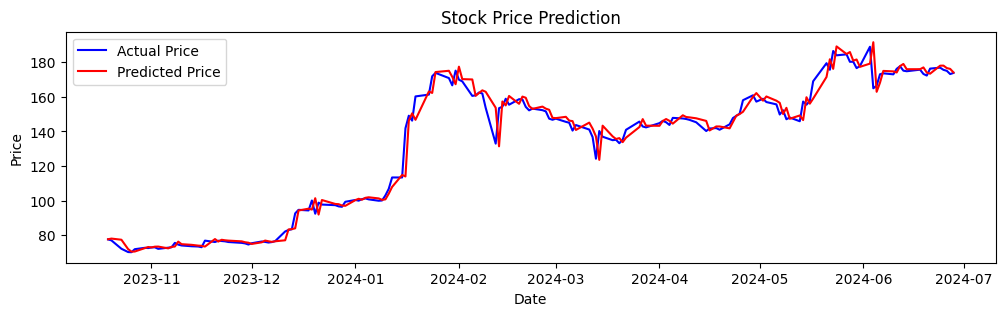

In [20]:
plt.figure(figsize=(12,3))
plt.plot(Clean_data.index[-len(y_test):],y_test,label="Actual Price",color='blue')
plt.plot(Clean_data.index[-len(y_test):],y_pred,label="Predicted Price",color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title("Stock Price Prediction")
plt.legend()
plt.show()